Import danych z plików csv do dataframe:

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

table_movie = pd.read_csv('tmdb_movies.csv')
table_genres = pd.read_csv('tmdb_genres.csv')
display(table_movie)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [43]:
value_q3 = table_movie["vote_count"].quantile(0.75)
table_movie_underthirdquartile = table_movie[table_movie["vote_count"] > value_q3]

table_movie_ten_top_rate_underthirdquartile = table_movie_underthirdquartile.sort_values(by='vote_average', ascending=False)[:10]
list_movie_ten_top_rate_underthirdquartile = table_movie_ten_top_rate_underthirdquartile['original_title']

print("Lista 10 najwyżej ocenianych filmów, których liczba głosów jest większa od 3. kwartyla rozkładu liczby głosów:")
for title in list_movie_ten_top_rate_underthirdquartile:
    print(f"- {title}")


Lista 10 najwyżej ocenianych filmów, których liczba głosów jest większa od 3. kwartyla rozkładu liczby głosów:
- The Shawshank Redemption
- The Godfather
- The Godfather: Part II
- Pulp Fiction
- Whiplash
- Schindler's List
- Fight Club
- 千と千尋の神隠し
- Psycho
- One Flew Over the Cuckoo's Nest


2.1. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie)

In [44]:
table_movie = table_movie[table_movie['release_date'].notnull()]                # usuwamy wiersze bez daty wydania filmu
table_movie['release_date'] = pd.to_datetime(table_movie['release_date'])       # zmieniamy format na date

table_movie['release_date_year'] = table_movie['release_date'].apply(lambda x: x.year if pd.notnull(x) else None)  # dodajemy kolumnę gdzie będzie tylko rok wydania filmu

table_movie_between_2010_2016 = table_movie[table_movie['release_date_year'].between(2010, 2016)]  # ograniczamy tabele do filmów z zakresu roku wydania 2010-2016
table_mean_of_revenue_budget = table_movie_between_2010_2016.pivot_table(index='release_date_year', values=['revenue','budget']) # tworzymy tabele przestawną gdzie indeksem są lata a wartościami jest średni budżet i średnie przychody.

2.2. Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach.

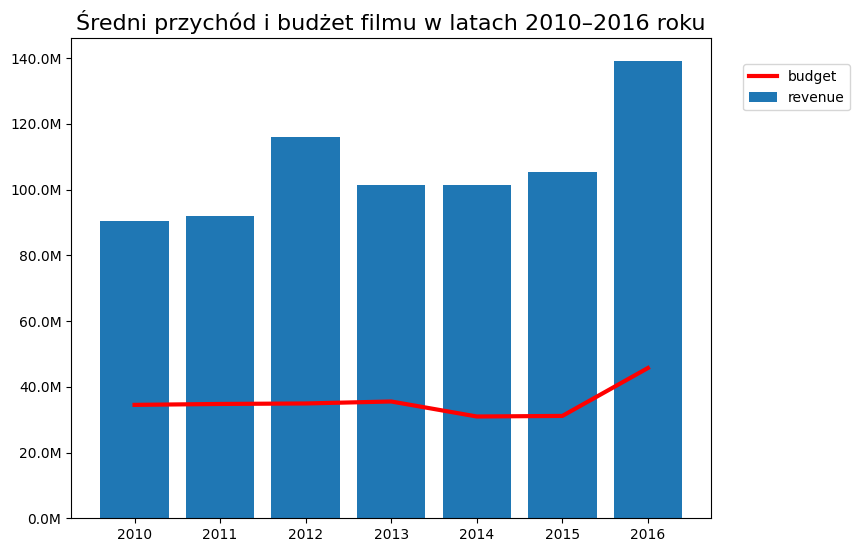

In [45]:
r = tuple(table_mean_of_revenue_budget['revenue'])
b = tuple(table_mean_of_revenue_budget['budget'])
y = tuple(table_mean_of_revenue_budget.index)

def million(x, pos):
    return '{:2.1f}M'.format(x*1e-6)

formatter = plt.FuncFormatter(million)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.yaxis.set_major_formatter(formatter)
axes.bar(y, r, label='revenue')
axes.plot(y, b, color='red',label='budget', linewidth = 3)
axes.legend(loc=(1.05,0.85))
axes.set_title('Średni przychód i budżet filmu w latach 2010–2016 roku',size=16)
plt.show()

3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [46]:
table_genres_new_index = table_genres.set_index(table_genres.columns[0])
table_movie = table_movie.join(table_genres_new_index, how='left', on='genre_id')
table_movie

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,release_date_year,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,1992,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,2011,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,2013,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,2012,NaN


4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [47]:
count_genres_movie = table_movie['genres'].value_counts()
top_count_genres_movie = count_genres_movie[count_genres_movie == count_genres_movie.max()]

print(f"W bazie filmów najczęściej pojawia się gatunek:")
for genre, count in top_count_genres_movie.items():
   print(f"'{genre}' - {count} razy")

W bazie filmów najczęściej pojawia się gatunek:
'Drama' - 1207 razy


5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [48]:
def formater(x):
    x = (str(pd.to_timedelta(x, unit='m').round('s')))[-8:]
    return x
    
movie_runtime_mean = table_movie.pivot_table(index='genres', values='runtime').round(2)
movie_runtime_mean['runtime_HHMMSS'] = movie_runtime_mean['runtime'].apply(lambda x: formater(x))
top_genre_runtime_mean = movie_runtime_mean[movie_runtime_mean['runtime'] == movie_runtime_mean['runtime'].max()]

print(f"W bazie filmów gatunek który średnio trwa najdłużej to:")
for genre, row in top_genre_runtime_mean.iterrows():
   print(f"'{genre}' - trwa średnio: {row['runtime_HHMMSS']}.")

W bazie filmów gatunek który średnio trwa najdłużej to:
'History' - trwa średnio: 02:13:58.


6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

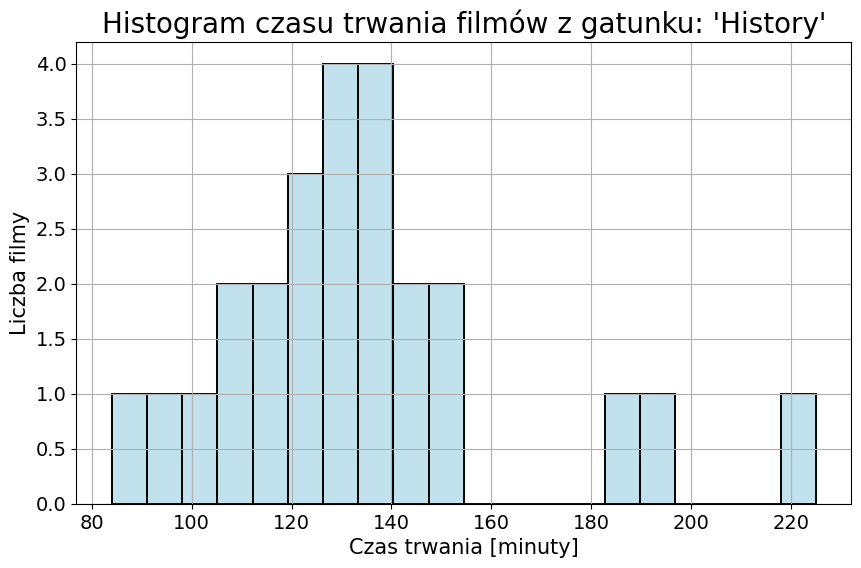

In [54]:
table_top_genre_runtime_mean = table_movie[table_movie['genres'] == top_genre_runtime_mean.index[0]]

plt.figure(figsize=(10, 6))

sns.histplot(
    data=table_top_genre_runtime_mean,
    x = 'runtime',
    bins=20,
    color='lightblue',
    edgecolor='black',
    linewidth=1.6
)

#plt.barh(table_top_genre_runtime_mean['original_title'], table_top_genre_runtime_mean['runtime'])
plt.xlabel('Czas trwania [minuty]', size=15)
plt.ylabel('Liczba filmy', size=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f"Histogram czasu trwania filmów z gatunku: '{top_genre_runtime_mean.index[0]}'", size=20)
plt.grid()
plt.show()